In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt


## Grey-scale Images

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


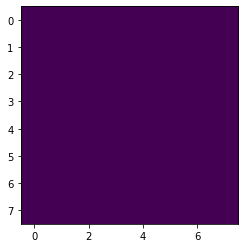

In [2]:
# create a black image of size [8x8]
#uint8 refers to unsigned, 8 referes to each value refers to 8 bit
image=np.zeros((8,8), dtype=np.uint8)
print(image)
plt.imshow(image)

In [3]:
# set pixel values
image[0:2,2:4]=128
image[1:3,5:7]=77
image[3:5,0:2]=255
image[5:7,4:6]=204

An image is just a Numpy Array:
 [[  0   0 128 128   0   0   0   0]
 [  0   0 128 128   0  77  77   0]
 [  0   0   0   0   0  77  77   0]
 [255 255   0   0   0   0   0   0]
 [255 255   0   0   0   0   0   0]
 [  0   0   0   0 204 204   0   0]
 [  0   0   0   0 204 204   0   0]
 [  0   0   0   0   0   0   0   0]]


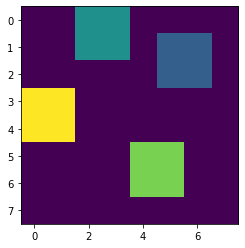

In [4]:
print('An image is just a Numpy Array:\n',image)
plt.imshow(image)

In [5]:
print('Shape of this image:',image.shape)

Shape of this image: (8, 8)


## Color images

- A RGB image can be represented as a 3-dimensional array
- Dimensions are H x W x channels
- Each channels represents red, green and blue respectively

In [6]:
image_color=np.zeros((8,8,3),dtype=np.uint8)

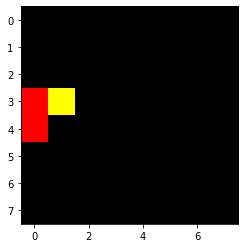

In [7]:
image_color[3,0,:]=np.array([255,0,0])
image_color[4,0,:]=np.array([255,0,0])
image_color[3,1,:]=np.array([255,255,0])
plt.imshow(image_color)

## Live Coding

### Image Arithmetic

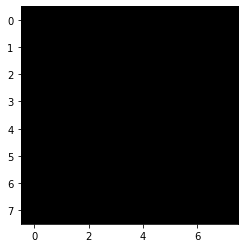

In [8]:
##create a toy image of size 8x8 of data type unit8
# amtplotlib use diffcolor map so does not fit well with grayscale
toy_image=np.zeros((8,8),dtype=np.uint8)
plt.imshow(toy_image, cmap='gray')
plt.show()

In [9]:
# set random pixels

toy_image[0,0]=255
toy_image[4,4]=150
toy_image[2,3]=50


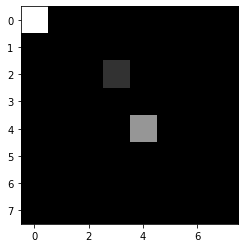

In [10]:
#visualise
plt.imshow(toy_image,cmap='gray')

In [11]:
#lighten the image by increasing the value of each pixel by 60
toy_image_bright=toy_image+60

In [12]:
# let's print some pixel values
print('The pixel value at postition[0,0]:',toy_image_bright[0,0])
print('The pixel value at postition[4,4]:',toy_image_bright[4,4])
print('The pixel value at postition[2,3]:',toy_image_bright[2,3])


The pixel value at postition[0,0]: 59
The pixel value at postition[4,4]: 210
The pixel value at postition[2,3]: 110


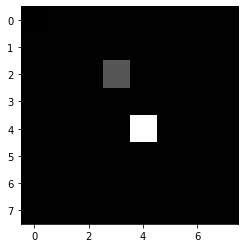

In [13]:
# visualise dark image and note changes
plt.imshow(toy_image_bright,cmap='gray')

In [14]:
# darken image by decreasing value of each pixel by 60
toy_image_dark=toy_image-60

In [15]:
# print some pixel values
print('The pixel value at postition[0,0]:',toy_image_dark[0,0])
print('The pixel value at postition[4,4]:',toy_image_dark[4,4])
print('The pixel value at postition[2,3]:',toy_image_dark[2,3])

The pixel value at postition[0,0]: 195
The pixel value at postition[4,4]: 90
The pixel value at postition[2,3]: 246


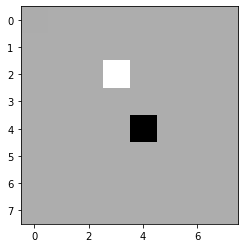

In [16]:
# visualise dark image and note changes

plt.imshow(toy_image_dark,cmap='gray')

### Notes
- Image stores as 8 bit integer 0-255
- If above 255, values will be swapped

In [17]:
# This behavior is known as integer overflow can cen be demonstrated with an simple example
pixel_val1=np.array([255],dtype=np.uint8)
pixel_val2=np.array([0],dtype=np.uint8)

In [18]:
# perform basic arithmetic operations and print results

print('Add Value 1:',pixel_val1+1)
print('Subtract Value 1:',pixel_val2-1)

Add Value 1: [0]
Subtract Value 1: [255]


In [19]:
# For convenient image arithmetic, we have to convert our image to float
toy_image_float=toy_image.astype(np.float32)

In [20]:
# print previous and current data type
print(toy_image.dtype)
print(toy_image_float.dtype)

uint8
float32


In [21]:
# let's try to make our image brighter again
toy_image_float_bright=toy_image_float+60

In [22]:
# print some pixel values
print('The pixel value at postition[0,0]:',toy_image_float_bright[0,0])
print('The pixel value at postition[4,4]:',toy_image_float_bright[4,4])
print('The pixel value at postition[2,3]:',toy_image_float_bright[2,3])

The pixel value at postition[0,0]: 315.0
The pixel value at postition[4,4]: 210.0
The pixel value at postition[2,3]: 110.0


In [23]:
# however, float is not a valid data type for saving images to disk - therefore we convert back to uint8

toy_final_image=toy_image_float_bright.clip(0,255).astype(np.uint8)

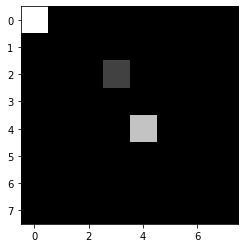

In [24]:
# visualise final images
plt.imshow(toy_final_image,cmap='gray')

### 1.1 Notes on image arithmetics
1. Convert your image to np.float32 by using .astype(np.float32)
2. Perform Image Arithmetics
3. Apply clipping by using .clip(0,255) or normalize images such that pixel within 0 and 255
4. Convert your image to np.uint8 by using .astype(np.uint8) and save it to disk

## 2 Reading Image files and writing images to disk and copy images

- In this course, we use the skimage library

In [25]:
import skimage.io

In [26]:
# load an image from disk
filename='./images/baboon-gray.jpg'
image_gray=skimage.io.imread(filename)

In [27]:
print('image gray dimensions are equal to',image_gray.shape)

image gray dimensions are equal to (512, 512)


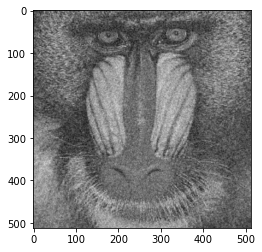

In [28]:
# visualise the image
plt.imshow(image_gray,cmap='gray')

In [29]:
# do some image arithmetics as shown in previous chapter
image_gray_float=image_gray.astype(np.float32)
image_gray_float_bright=image_gray_float+100
bright=image_gray_float_bright.clip(0,255).astype(np.uint8)

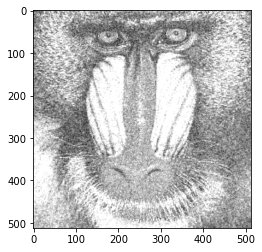

In [30]:
plt.imshow(bright,cmap='gray')

In [31]:
# save image to disk
filename_save='./images/baboon_save.png'
skimage.io.imsave(filename_save,bright)

In [32]:
# Do the same with RGB images-first load the image
filename='./images/baboon-rgb.png'
image_rgb=skimage.io.imread(filename)

In [33]:
# get the image dimension
print('Image Dimension of RGB:',image_rgb.shape)

Image Dimension of RGB: (512, 512, 3)


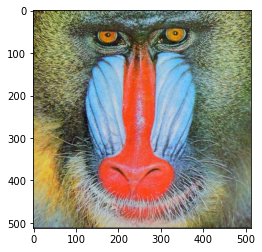

In [34]:
# visualise the rgb image
plt.imshow(image_rgb)

In [35]:
# Extract the R, G and B channels
red_channel=image_rgb[:,:,0]
green_channel=image_rgb[:,:,1]
blue_channel=image_rgb[:,:,2]

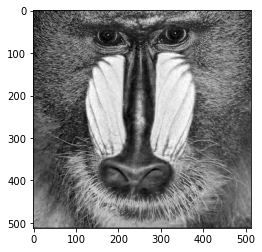

In [36]:
#visualise the color channel
plt.imshow(blue_channel,cmap='gray')


### Notes
- blue value will appear as white
- red value will appear as black

In [37]:
# Now let us merge it back to H xW x 3
stacked=np.stack([red_channel,green_channel,blue_channel],axis=-1)
print(stacked.shape)

(512, 512, 3)


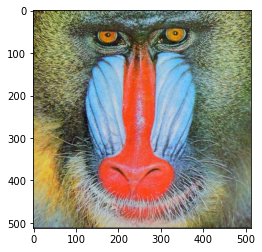

In [38]:
# visualise the stacked image
plt.imshow(stacked)

In [39]:
# let us assume we want to modify our rgb image but before we want to copy it to make sure its not corrupted
image_copy=image_gray

In [40]:
# make some modifications
image_copy[0:100,0:100]=0

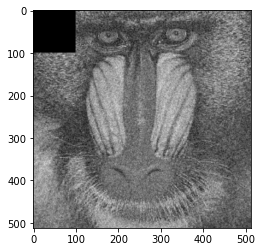

In [41]:
# visualise modified image
plt.imshow(image_copy,cmap='gray')

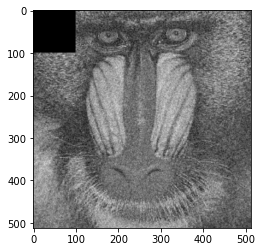

In [42]:
# visualise original image
plt.imshow(image_gray,cmap='gray')

## Notes
- The original image is also modified
- if u dont make a copy, its a reference to the computer memory. Any modification will auto-appear

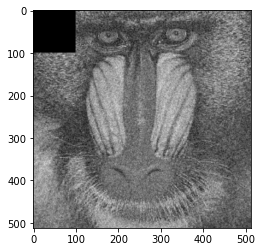

In [43]:
# should make use of
filename='./images/baboon-gray.jpg'
image_gray=skimage.io.imread(filename)
image_copy_right=image_gray.copy()
image_copy_right[0:100,0:100]=0
plt.imshow(image_copy_right,cmap='gray')

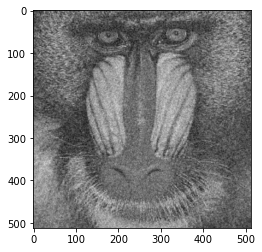

In [44]:
plt.imshow(image_gray,cmap='gray')

## 3. Operations with Numpy Array
- Since images are just np.ndarray we can perform common operations

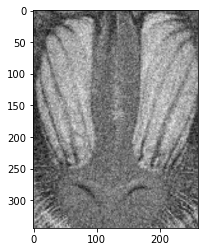

In [45]:
# crop images by slicing
nose=image_gray[96:440,120:380]
plt.imshow(nose,cmap='gray')

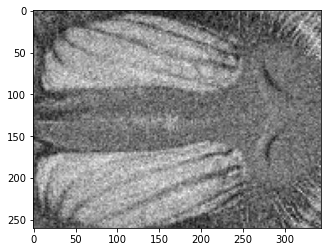

In [46]:
# get the transposed image
#
nose_transposed=nose.T
plt.imshow(nose_transposed,cmap='gray')

## 3.1 Note on how Numpy Operators work
- +,- operators applied elementwise

In [47]:
# Examples of elementwise multiplication
a=np.ones((3,3))
b=np.ones((3,3))
mul=a*b
print(mul)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


- To perform matrix multiplication(linear algebra), use the @ operator

In [48]:
# example of matrix multiplication 
matrix_mul=a@b
print(matrix_mul)

[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


In [49]:
# This is quite important e.g if you want to perform rotations
R=np.array([[np.cos(np.pi),-np.sin(np.pi)],[np.sin(np.pi),np.cos(np.pi)]])
print('Dimension of R:',R.shape)

p=np.array([[1],[0]])
p_transformed=R@p
print('p_transformed:\n',p_transformed)

Dimension of R: (2, 2)
p_transformed:
 [[-1.0000000e+00]
 [ 1.2246468e-16]]


In [50]:
# compute the inverse
R_inv=np.linalg.inv(R)
print('The inverse of R:\n',R_inv)

The inverse of R:
 [[-1.0000000e+00  1.2246468e-16]
 [-1.2246468e-16 -1.0000000e+00]]
